# Phase 5

## Table of Contents
* [Initial Model](#chapter1)
* [Parameter Adjustments](#chapter2)
    * [Random State](#section_2_1)
    * [Number of Estimators](#section_2_2)
    * [Maximum Depth](#section_2_3)
    * [Number of Jobs](#section_2_4)
    * [Minimum Samples Split](#section_2_5)
    * [Minimum Number of Samples at Leaf Node](#section_2_6)
    * [Maximum Number of Features for Best Split](#section_2_7)
    * [Class Weights](#section_2_8)
* [Autobinning](#chapter3)
* [Refined Model Random State](#chapter4)
* [Initial vs Refined Model Comparison](#chapter5)
    * [Initial Model Performance](#section_5_1)
    * [Refined Model Performance](#section_5_2)
* [Finalized Model](#chapter6)

In [1]:
## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
x_train= pd.read_csv("xtrain.csv")
y_train= pd.read_csv("ytrain.csv")
x_test=pd.read_csv("xtest.csv")
y_test= pd.read_csv("ytest.csv")

x_train= x_train.iloc[:,1:]
x_test= x_test.iloc[:,1:]
y_train= y_train.iloc[:,1:]
y_test= y_test.iloc[:,1:]

print(x_train.shape,x_test.shape, y_train.shape, y_test.shape )

(1388969, 83) (462990, 83) (1388969, 1) (462990, 1)


In [3]:
train=pd.concat([x_train,y_train],axis=1)
test=pd.concat([x_test,y_test],axis=1)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
def evaluate_perf(y_test,y_pred): # a function to evaluate the performance of a model
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp) #since the data is unbalanced
    recall = recall_score(y_test, y_pred)
    
    #print('Specificity = {}'.format(specificity))
    print('Recall = {}'.format(recall))
    #print(classification_report(y_test, y_pred, target_names=['0', '1']))
    
    return({'specificty':specificity, 'recall':recall})    

<a id="chapter1"></a>
### Initial Model

In [21]:
rf = RandomForestClassifier(criterion='entropy',random_state=1)
rf.fit(x_train,y_train)

y_pred= rf.predict(x_test)

In [22]:
evaluate_perf(y_test,y_pred)

Recall = 0.7407561279601164


{'specificty': 0.999932693998693, 'recall': 0.7407561279601164}

<a id="chapter2"></a>
### Parameter Adjustments

<a id="section_2_1"></a>
#### 1. Random State

In [23]:
for i in range(0,100,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(random_state=i,criterion='entropy')
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  0
Recall = 0.7345243041130037
Estimators =  1
Recall = 0.7407561279601164
Estimators =  2
Recall = 0.7386788533444121
Estimators =  3
Recall = 0.7432488574989614
Estimators =  4
Recall = 0.7345243041130037
Estimators =  5
Recall = 0.7382633984212713
Estimators =  6
Recall = 0.7432488574989614
Estimators =  7
Recall = 0.7324470294972996
Estimators =  8
Recall = 0.7349397590361446
Estimators =  9
Recall = 0.7411715828832571
Estimators =  10
Recall = 0.7395097631906938
Estimators =  11
Recall = 0.7366015787287079
Estimators =  12
Recall = 0.7403406730369755
Estimators =  13
Recall = 0.7353552139592854
Estimators =  14
Recall = 0.7366015787287079
Estimators =  15
Recall = 0.7403406730369755
Estimators =  16
Recall = 0.739094308267553
Estimators =  17
Recall = 0.7366015787287079
Estimators =  18
Recall = 0.7336933942667221
Estimators =  19
Recall = 0.7382633984212713
Estimators =  20
Recall = 0.7382633984212713
Estimators =  21
Recall = 0.7336933942667221
Estimators =  22
Reca

Value that yields highest recall is random_state=50

<a id="section_2_2"></a>
#### 2. Number of Estimators

In [24]:
for i in range(1,100,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=50)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  1
Recall = 0.7154133776485251
Estimators =  2
Recall = 0.6186123805567096
Estimators =  3
Recall = 0.7420024927295389
Estimators =  4
Recall = 0.6734524304113004
Estimators =  5
Recall = 0.7503115911923556
Estimators =  6
Recall = 0.7029497299542999
Estimators =  7
Recall = 0.7399252181138346
Estimators =  8
Recall = 0.7145824678022434
Estimators =  9
Recall = 0.7536352305774824
Estimators =  10
Recall = 0.7262152056501869
Estimators =  11
Recall = 0.7457415870378064
Estimators =  12
Recall = 0.7262152056501869
Estimators =  13
Recall = 0.7474034067303698
Estimators =  14
Recall = 0.7324470294972996
Estimators =  15
Recall = 0.7528043207312006
Estimators =  16
Recall = 0.7282924802658911
Estimators =  17
Recall = 0.7453261321146656
Estimators =  18
Recall = 0.7295388450353136
Estimators =  19
Recall = 0.7420024927295389
Estimators =  20
Recall = 0.7320315745741587
Estimators =  21
Recall = 0.7474034067303698
Estimators =  22
Recall = 0.7349397590361446
Estimators =  23
Re

Value yielding highest recall is n_estimators=65

<a id="section_2_3"></a>
#### 3. Maximum Depth

In [25]:
for i in range(1,100,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(max_depth=i,criterion='entropy',
                                random_state=50,
                               n_estimators= 65)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  1
Recall = 0.0
Estimators =  2
Recall = 0.0
Estimators =  3
Recall = 0.0
Estimators =  4
Recall = 0.0
Estimators =  5
Recall = 0.0
Estimators =  6
Recall = 0.0
Estimators =  7
Recall = 0.011217282924802658
Estimators =  8
Recall = 0.02201911092646448
Estimators =  9
Recall = 0.18737017033651848
Estimators =  10
Recall = 0.3498130452845866
Estimators =  11
Recall = 0.423764021603656
Estimators =  12
Recall = 0.4777731616119651
Estimators =  13
Recall = 0.5105941005400914
Estimators =  14
Recall = 0.519318653926049
Estimators =  15
Recall = 0.5413377648525135
Estimators =  16
Recall = 0.5562941420855837
Estimators =  17
Recall = 0.5749896136269215
Estimators =  18
Recall = 0.6103032820938928
Estimators =  19
Recall = 0.6294142085583714
Estimators =  20
Recall = 0.6734524304113004
Estimators =  21
Recall = 0.6884088076443706
Estimators =  22
Recall = 0.7095970087245533
Estimators =  23
Recall = 0.70793518903199
Estimators =  24
Recall = 0.7170751973410885
Estimators =  25
Re

Value with highest recall max_depth=57

<a id="section_2_4"></a>
#### 4. Number of Jobs to run in parallel

In [26]:
for i in [-2,-1,1,2,3]:
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,n_jobs=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  -2
Recall = 0.7552970502700457
Estimators =  -1
Recall = 0.7552970502700457
Estimators =  1
Recall = 0.7552970502700457
Estimators =  2
Recall = 0.7552970502700457
Estimators =  3
Recall = 0.7552970502700457


All possible values of the parameter yield the same recall value, thus this parameter will be set to its default value since it doesn't affect the performance of the model.

<a id="section_2_5"></a>
#### 5. Minimum Samples Split

In [27]:
for i in range(2,100,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  2
Recall = 0.7552970502700457
Estimators =  3
Recall = 0.7486497714997923
Estimators =  4
Recall = 0.7370170336518488
Estimators =  5
Recall = 0.7420024927295389
Estimators =  6
Recall = 0.7353552139592854
Estimators =  7
Recall = 0.7374324885749897
Estimators =  8
Recall = 0.7332779393435812
Estimators =  9
Recall = 0.7278770253427503
Estimators =  10
Recall = 0.7282924802658911
Estimators =  11
Recall = 0.728707935189032
Estimators =  12
Recall = 0.7199833818030744
Estimators =  13
Recall = 0.7303697548815954
Estimators =  14
Recall = 0.7282924802658911
Estimators =  15
Recall = 0.7282924802658911
Estimators =  16
Recall = 0.7299542999584545
Estimators =  17
Recall = 0.7166597424179476
Estimators =  18
Recall = 0.7241379310344828
Estimators =  19
Recall = 0.7228915662650602
Estimators =  20
Recall = 0.7208142916493561
Estimators =  21
Recall = 0.7112588284171167
Estimators =  22
Recall = 0.7133361030328209
Estimators =  23
Recall = 0.7203988367262152
Estimators =  24
Re

As the values of this parameter increased, the recall metric decreased from 0.755 to 0.66. Thus, the best value for this parameter is min_samples_split=2 which is the default value.

<a id="section_2_6"></a>
#### 6. Minimum Number of Samples required to be at a leaf node

In [28]:
for i in range(1,100,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=2,
                               min_samples_leaf=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  1
Recall = 0.7552970502700457
Estimators =  2
Recall = 0.7324470294972996
Estimators =  3
Recall = 0.7033651848774408
Estimators =  4
Recall = 0.6987951807228916
Estimators =  5
Recall = 0.6759451599501454
Estimators =  6
Recall = 0.669297881179892
Estimators =  7
Recall = 0.6763606148732862
Estimators =  8
Recall = 0.6626506024096386
Estimators =  9
Recall = 0.6514333194848358
Estimators =  10
Recall = 0.6584960531782301
Estimators =  11
Recall = 0.6373078520980474
Estimators =  12
Recall = 0.6285832987120897
Estimators =  13
Recall = 0.6431242210220192
Estimators =  14
Recall = 0.6198587453261322
Estimators =  15
Recall = 0.6211051100955546
Estimators =  16
Recall = 0.6032405484004986
Estimators =  17
Recall = 0.6057332779393436
Estimators =  18
Recall = 0.6053178230162027
Estimators =  19
Recall = 0.5986705442459493
Estimators =  20
Recall = 0.6036560033236393
Estimators =  21
Recall = 0.5916078105525551
Estimators =  22
Recall = 0.5841296219360199
Estimators =  23
Rec

The model with the default parameter value performed better than the rest of the values. Thus, the default value for this parameter, min_samples_leaf, will be set. 

<a id="section_2_7"></a>
#### 7. Maximum Number of Features to consider when looking for the best split

In [29]:
for i in range(1,83,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=2,
                               min_samples_leaf=1,max_features=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  1
Recall = 0.37557125051931867
Estimators =  2
Recall = 0.4744495222268384
Estimators =  3
Recall = 0.5724968840880764
Estimators =  4
Recall = 0.6157041960947237
Estimators =  5
Recall = 0.6551724137931034
Estimators =  6
Recall = 0.6850851682592439
Estimators =  7
Recall = 0.715828832571666
Estimators =  8
Recall = 0.7328624844204403
Estimators =  9
Recall = 0.7552970502700457
Estimators =  10
Recall = 0.754466140423764
Estimators =  11
Recall = 0.7656834233485666
Estimators =  12
Recall = 0.7681761528874117
Estimators =  13
Recall = 0.7785625259659327
Estimators =  14
Recall = 0.7843788948899044
Estimators =  15
Recall = 0.7864561695056086
Estimators =  16
Recall = 0.7897798088907354
Estimators =  17
Recall = 0.7935189031990029
Estimators =  18
Recall = 0.798504362276693
Estimators =  19
Recall = 0.800997091815538
Estimators =  20
Recall = 0.800997091815538
Estimators =  21
Recall = 0.8001661819692564
Estimators =  22
Recall = 0.8039052762775238
Estimators =  23
Recall

Limiting the number of features to be considered for each split yields better performing models since there are 83 features in the dataset. Thus, max_features=64 features yielded highest recall.

<a id="section_2_8"></a>
#### 8. Class Weights

In [33]:
for i in ['balanced','balanced_subsample']:
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=2,
                               min_samples_leaf=1,max_features=64,class_weight=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  balanced
Recall = 0.8275862068965517
Estimators =  balanced_subsample
Recall = 0.8296634815122559


In [31]:
for i in [{1:1},{1:2},{1:3},{1:4},{1:5},{1:6},{1:7},{1:8},{1:9},{1:10}]:
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=2,
                               min_samples_leaf=1,max_features=64,class_weight=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  {1: 1}
Recall = 0.8325716659742418
Estimators =  {1: 2}
Recall = 0.8313253012048193
Estimators =  {1: 3}
Recall = 0.8325716659742418
Estimators =  {1: 4}
Recall = 0.8313253012048193
Estimators =  {1: 5}
Recall = 0.8304943913585376
Estimators =  {1: 6}
Recall = 0.8304943913585376
Estimators =  {1: 7}
Recall = 0.8284171167428334
Estimators =  {1: 8}
Recall = 0.8317407561279602
Estimators =  {1: 9}
Recall = 0.8271707519734108
Estimators =  {1: 10}
Recall = 0.8300789364353968


In [58]:
for i in [{0:1,1:3},{0:1,1:10},{0:1,1:20},{0:1,1:30},{0:1,1:40},{0:1,1:50},{0:1,1:60},{0:1,1:70}]:
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,max_features=64,class_weight=i)
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  {0: 1, 1: 3}
Recall = 0.8325716659742418
Estimators =  {0: 1, 1: 10}
Recall = 0.8300789364353968
Estimators =  {0: 1, 1: 20}
Recall = 0.8313253012048193
Estimators =  {0: 1, 1: 30}
Recall = 0.8292480265891151
Estimators =  {0: 1, 1: 40}
Recall = 0.8317407561279602
Estimators =  {0: 1, 1: 50}
Recall = 0.8263398421271292
Estimators =  {0: 1, 1: 60}
Recall = 0.8296634815122559
Estimators =  {0: 1, 1: 70}
Recall = 0.8280016618196926


Best Model {1:3} fraudulent transactions 3 times the weight of the nonfraudulent.

<a id="chapter3"></a>
### Autobinning

Numeric Features:   
- trans_day
- trans_month
- trans_year
- trans_hour
- trans_minute
- amt
- age
- city_pop
- dist_km

In [9]:
data= pd.read_csv('New CCTrans.csv')
data=data.drop(columns='Unnamed: 0')
data.head()

,is_fraud,amt,gender,dist_km,city_pop,trans_day,trans_month,trans_year,trans_hour,trans_minute,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_other
0,0,-0.421972,0,-1.770478,0.812000,0.580129,-0.336314,0.998675,-0.118366,-0.894424,...,0,0,0,0,0,0,0,0,0,0
1,0,-0.252560,1,0.989553,-0.293049,0.580129,-0.336314,0.998675,-0.118366,-0.894424,...,0,0,1,0,0,0,0,0,0,0
2,0,-0.180726,1,-0.584961,-0.179643,0.580129,-0.336314,0.998675,-0.118366,-0.894424,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.062866,0,-1.662736,-0.112414,0.580129,-0.336314,0.998675,-0.118366,-0.836709,...,0,0,0,0,0,0,0,0,0,0
4,0,-0.419900,0,0.969291,-0.290316,0.580129,-0.336314,0.998675,-0.118366,-0.836709,...,0,0,0,0,0,0,0,0,0,0


In [10]:
stat= pd.read_csv("Stat.csv")
stat= stat.drop(columns='Unnamed: 0')
stat

,feature,mean,variance
0,trans_day,15.850636,8.876237
1,trans_month,7.151836,3.424888
2,trans_year,2019.500663,0.500000
3,trans_hour,12.806742,6.815632
4,trans_minute,29.497128,17.326370
5,age,45.754350,17.398243
6,amt,70.061827,159.256736
7,city_pop,88662.197575,301520.601135
8,dist_km,76.112445,29.116965


In [11]:
# un-normalizing the feature to see their initial distribution
data['trans_day'] = (data['trans_day'] * stat.iloc[0,2])+ stat.iloc[0,1]
data['trans_month'] = (data['trans_month'] * stat.iloc[1,2])+ stat.iloc[1,1]
data['trans_year'] = (data['trans_year'] *  stat.iloc[2,2])+ stat.iloc[2,1]
data['trans_hour'] = (data['trans_hour'] * stat.iloc[3,2])+ stat.iloc[3,1]
data['trans_minute'] = (data['trans_minute'] * stat.iloc[4,2])+ stat.iloc[4,1]
data['age']= (data['age'] * stat.iloc[5,2])+ stat.iloc[5,1]
data['amt']= (data['amt'] * stat.iloc[6,2])+ stat.iloc[6,1]
data['city_pop']= (data['city_pop'] * stat.iloc[7,2])+ stat.iloc[7,1]
data['dist_km']= (data['dist_km'] * stat.iloc[8,2])+ stat.iloc[8,1]

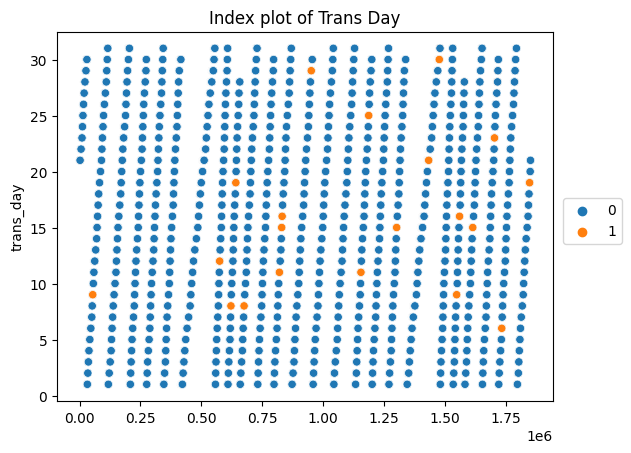

In [12]:
sns.scatterplot(x=data.index, y='trans_day', data=data, hue='is_fraud').set(title='Index plot of Trans Day')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

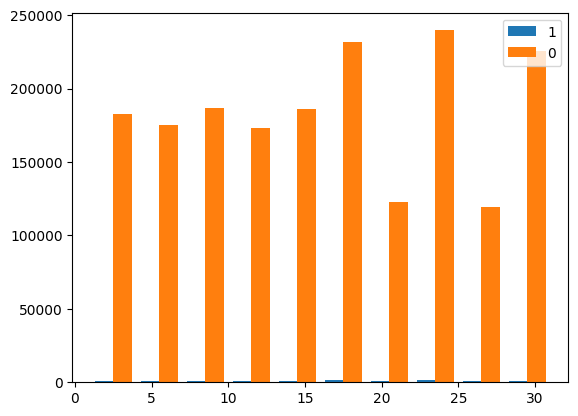

In [13]:
sorted= data.sort_values("trans_day")

x = sorted[sorted.is_fraud==1].trans_day
y = sorted[sorted.is_fraud==0].trans_day

plt.hist([x, y], label=['1', '0'])
plt.legend(loc='upper right')
plt.show()

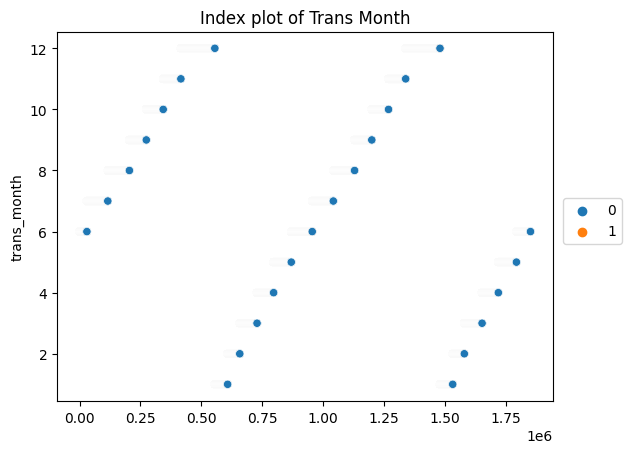

In [14]:
sns.scatterplot(x=data.index, y='trans_month', data=data, hue='is_fraud').set(title='Index plot of Trans Month')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

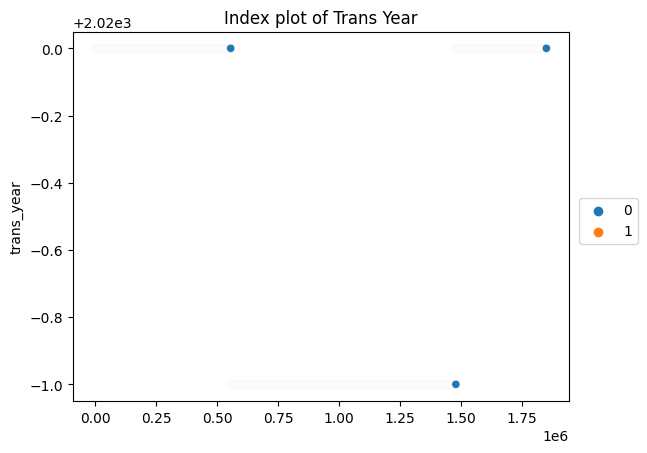

In [15]:
sns.scatterplot(x=data.index, y='trans_year', data=data, hue='is_fraud').set(title='Index plot of Trans Year')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

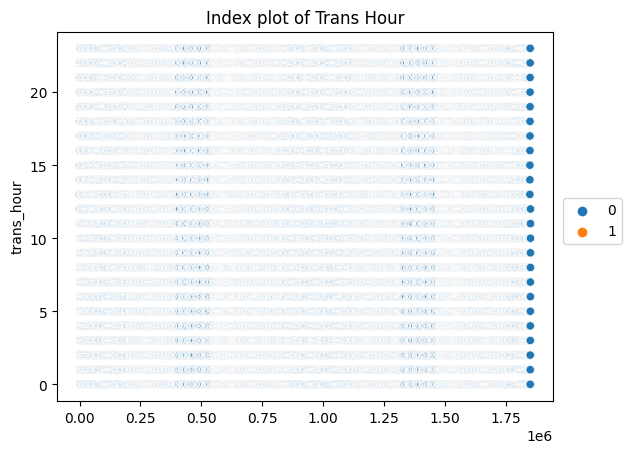

In [16]:
sns.scatterplot(x=data.index, y='trans_hour', data=data, hue='is_fraud').set(title='Index plot of Trans Hour')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

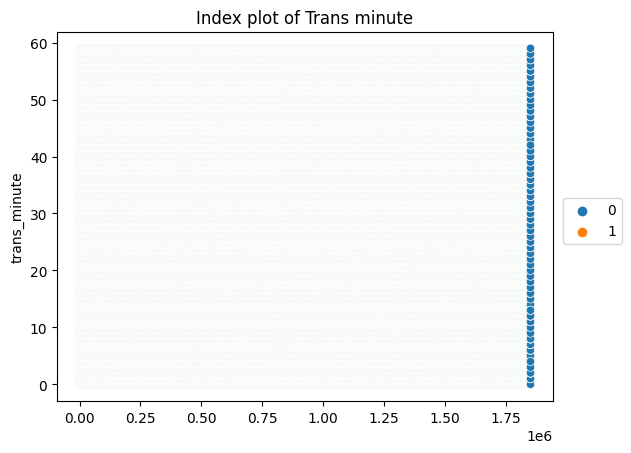

In [17]:
sns.scatterplot(x=data.index, y='trans_minute', data=data, hue='is_fraud').set(title='Index plot of Trans minute')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

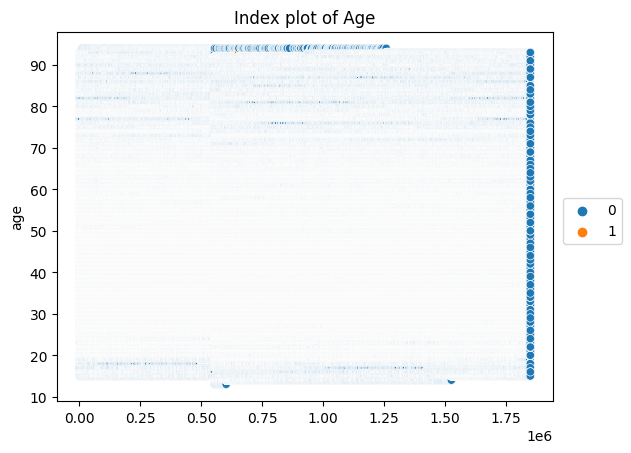

In [18]:
sns.scatterplot(x=data.index, y='age', data=data, hue='is_fraud').set(title='Index plot of Age')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

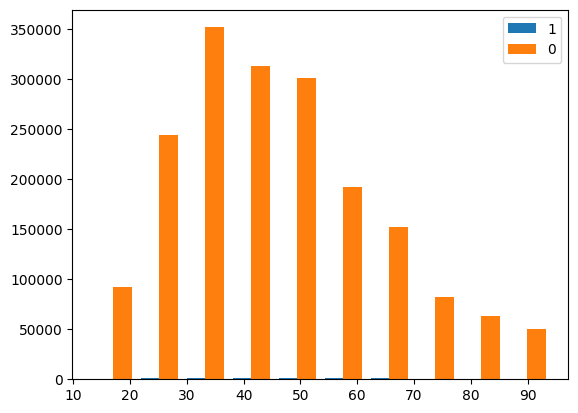

In [19]:
sorted= data.sort_values("age")

x = sorted[sorted.is_fraud==1].age
y = sorted[sorted.is_fraud==0].age

plt.hist([x, y], label=['1', '0'])
plt.legend(loc='upper right')
plt.show()

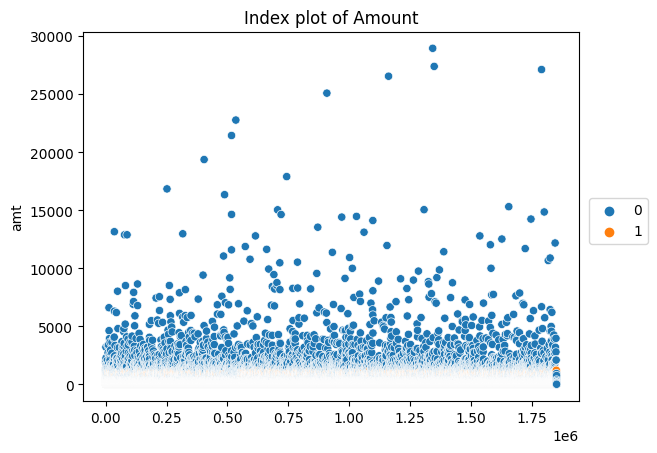

In [20]:
sns.scatterplot(x=data.index, y='amt', data=data, hue='is_fraud').set(title='Index plot of Amount')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

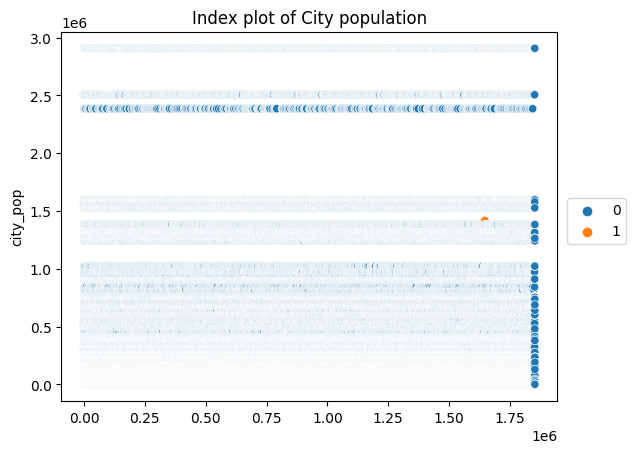

In [21]:
sns.scatterplot(x=data.index, y='city_pop', data=data, hue='is_fraud').set(title='Index plot of City population')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

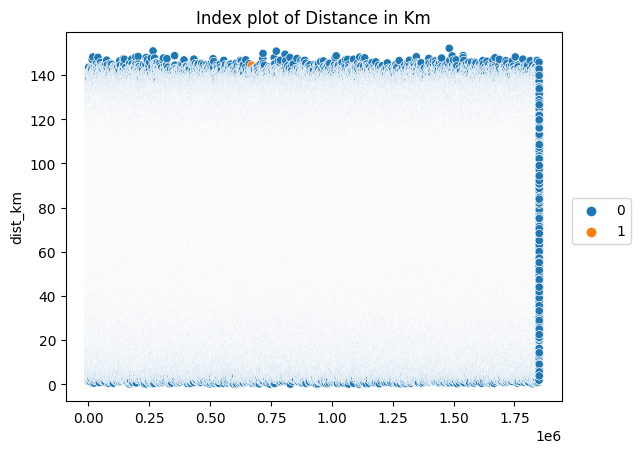

In [22]:
sns.scatterplot(x=data.index, y='dist_km', data=data, hue='is_fraud').set(title='Index plot of Distance in Km')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

Hence, the autobinning internally done in the model will be kept the same.

<a id="chapter4"></a>
### Refined Model Random State 

In [34]:
for i in range(0,100,1):
    print('Estimators = ',i)
    rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=i, max_depth=57,min_samples_split=2,
                               min_samples_leaf=1,max_features=64,class_weight={0:1,1:3})
    rf.fit(x_train,y_train)
    
    y_pred= rf.predict(x_test)
    evaluate_perf(y_test,y_pred)

Estimators =  0
Recall = 0.8304943913585376
Estimators =  1
Recall = 0.8288325716659742
Estimators =  2
Recall = 0.8288325716659742
Estimators =  3
Recall = 0.8288325716659742
Estimators =  4
Recall = 0.8271707519734108
Estimators =  5
Recall = 0.8317407561279602
Estimators =  6
Recall = 0.8296634815122559
Estimators =  7
Recall = 0.8296634815122559
Estimators =  8
Recall = 0.8313253012048193
Estimators =  9
Recall = 0.8296634815122559
Estimators =  10
Recall = 0.8280016618196926
Estimators =  11
Recall = 0.8313253012048193
Estimators =  12
Recall = 0.8280016618196926
Estimators =  13
Recall = 0.8292480265891151
Estimators =  14
Recall = 0.8284171167428334
Estimators =  15
Recall = 0.8309098462816784
Estimators =  16
Recall = 0.8292480265891151
Estimators =  17
Recall = 0.8280016618196926
Estimators =  18
Recall = 0.8309098462816784
Estimators =  19
Recall = 0.8304943913585376
Estimators =  20
Recall = 0.8300789364353968
Estimators =  21
Recall = 0.8292480265891151
Estimators =  22
Rec

Making sure that the value of random_state,50, yields highest recall.

<a id="chapter5"></a>
### Initial Model vs Refined Model Comparison

In [5]:
def evaluate_perf(y_test,y_pred): # a function to evaluate the performance of a model
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp) #since the data is unbalanced
    recall = recall_score(y_test, y_pred)
    
    print('Specificity = {}'.format(specificity))
    print('Recall = {}'.format(recall))
    print(classification_report(y_test, y_pred, target_names=['0', '1']))
    
    return({'specificty':specificity, 'recall':recall})  

<a id="section_5_1"></a>
#### ***Initial Model Performance***

In [36]:
rf = RandomForestClassifier(criterion='entropy',random_state=1)
rf.fit(x_train,y_train)

y_pred= rf.predict(x_test)
evaluate_perf(y_test,y_pred)

Specificity = 0.999932693998693
Recall = 0.7407561279601164
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460583
           1       0.98      0.74      0.84      2407

    accuracy                           1.00    462990
   macro avg       0.99      0.87      0.92    462990
weighted avg       1.00      1.00      1.00    462990



{'specificty': 0.999932693998693, 'recall': 0.7407561279601164}

<a id="section_5_2"></a>
#### ***Refined Model Performance***

In [37]:
rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=2,
                               min_samples_leaf=1,max_features=64,class_weight={0:1,1:3})
rf.fit(x_train,y_train)
    
y_pred= rf.predict(x_test)
evaluate_perf(y_test,y_pred)

Specificity = 0.9997959108347464
Recall = 0.8325716659742418
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460583
           1       0.96      0.83      0.89      2407

    accuracy                           1.00    462990
   macro avg       0.98      0.92      0.94    462990
weighted avg       1.00      1.00      1.00    462990



{'specificty': 0.9997959108347464, 'recall': 0.8325716659742418}

<a id="chapter6"></a>
### Finalized Model

In [8]:
rf = RandomForestClassifier(n_estimators=65,criterion='entropy',
                                random_state=50, max_depth=57,min_samples_split=2,
                               min_samples_leaf=1,max_features=64,class_weight={0:1,1:3})
rf.fit(x_train,y_train)
    
y_pred= rf.predict(x_test)
evaluate_perf(y_test,y_pred)

Specificity = 0.9997959108347464
Recall = 0.8325716659742418
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460583
           1       0.96      0.83      0.89      2407

    accuracy                           1.00    462990
   macro avg       0.98      0.92      0.94    462990
weighted avg       1.00      1.00      1.00    462990



{'specificty': 0.9997959108347464, 'recall': 0.8325716659742418}